*Creado por:*
    
*Isabel Maniega*

# crea un clasificador para MNIST

In [1]:
# el test espera clasificar 10 clases, 0 a 9
# No uses lambda layers en tu modelo
# La "accuracy" y "validation_accuracy" deseada es: > 91%

**EJEMPLO 1: Todo en un mismo archivo**

2025-07-06 14:53:13.963126: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 14:53:14.248667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751806394.348632    5350 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751806394.380831    5350 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751806394.602364    5350 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/home/isabelmaniega/Documentos/IA_Python/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751806401.028063    5350 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1751806402.811309    5454 service.cc:152] XLA service 0x74e54c002850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751806402.811336    5454 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-07-06 14:53:22.856627: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751806403.125950    5454 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-06 14:53:24.971920: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_244', 4 bytes spill stores, 4 bytes spill loads



  21/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2051 - loss: 2.1502

I0000 00:00:1751806406.786802    5454 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9076 - loss: 0.2902 - val_accuracy: 0.9834 - val_loss: 0.0527
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9850 - loss: 0.0487 - val_accuracy: 0.9878 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9821 - val_loss: 0.0541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9936 - loss: 0.0217 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9879 - val_loss: 0.0382
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.9896 - val_loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9974 - loss: 0.0077

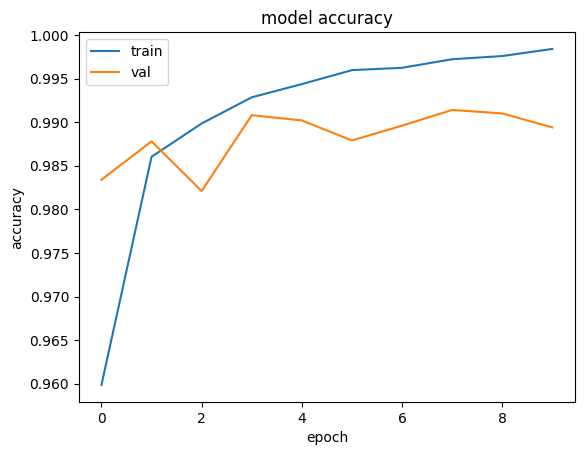

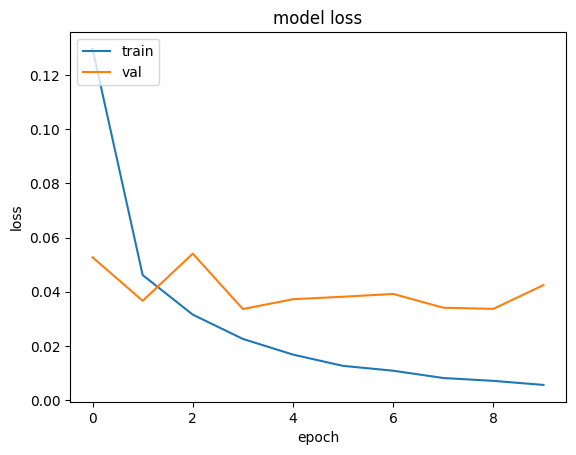

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt

def classification_model_1():
    mnist = tf.keras.datasets.mnist

    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    # DEFINE YOUR MODEL HERE
    # End with 10 Neuron Dense, activated by softmax
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # COMPILE MODEL HERE
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # TRAIN YOUR MODEL HERE
    history = model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

    # ploteamos 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    return model



# el código de abajo es para guardar el modelo como un archivo .h5

if __name__ == '__main__':
    model_1 = classification_model_1()
    model_1.save("model_1.h5")

**como se puede ver, resuelve el problema, pero tiene mejora**

*Creado por:*
    
*Isabel Maniega*